In [55]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 


In [17]:
df = pd.read_csv('healthcare.csv')

In [18]:
df.head()

patient_id  age  gender    test_type  result  doctor_id  \
0           1   56    Male   Hemoglobin    14.8        102   
1           2   69  Female    Ovulation    18.5        198   
2           3   46    Male    Ovulation    13.3        101   
3           4   32  Female  Sperm_Count    45.3        126   
4           5   60  Female    Ovulation    12.1        181   

                  date  
0  2023-01-01 00:00:00  
1  2023-01-01 00:01:00  
2  2023-01-01 00:02:00  
3  2023-01-01 00:03:00  
4  2023-01-01 00:04:00

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   patient_id  100000 non-null  int64  
 1   age         100000 non-null  int64  
 2   gender      100000 non-null  object 
 3   test_type   100000 non-null  object 
 4   result      100000 non-null  float64
 5   doctor_id   100000 non-null  int64  
 6   date        100000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [28]:
df['date'] = pd.to_datetime(df['date'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   patient_id  100000 non-null  int64         
 1   age         100000 non-null  int64         
 2   gender      100000 non-null  object        
 3   test_type   100000 non-null  object        
 4   result      100000 non-null  float64       
 5   doctor_id   100000 non-null  int64         
 6   date        100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 5.3+ MB


In [30]:
df.isnull().sum()

patient_id    0
age           0
gender        0
test_type     0
result        0
doctor_id     0
date          0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [26]:
df.reset_index(drop=True)

patient_id  age  gender    test_type  result  doctor_id  \
0               1   56    Male   Hemoglobin    14.8        102   
1               2   69  Female    Ovulation    18.5        198   
2               3   46    Male    Ovulation    13.3        101   
3               4   32  Female  Sperm_Count    45.3        126   
4               5   60  Female    Ovulation    12.1        181   
...           ...  ...     ...          ...     ...        ...   
99995       99996   53    Male    Ovulation    20.8        190   
99996       99997   22    Male    Ovulation    14.4        186   
99997       99998   37    Male   Hemoglobin    15.1        141   
99998       99999   72  Female   Kidney_ACR    14.8        171   
99999      100000   37    Male    Ovulation     6.3        129   

                     date  
0     2023-01-01 00:00:00  
1     2023-01-01 00:01:00  
2     2023-01-01 00:02:00  
3     2023-01-01 00:03:00  
4     2023-01-01 00:04:00  
...                   ...  
99995 2023-03-11 10:35:00  
99996 2023-03-11 10:36:00  
99997 2023-03-11 10:37:00  
99998 2023-03-11 10:38:00  
99999 2023-03-11 10:39:00  

[100000 rows x 7 columns]

In [32]:
df.head()

patient_id  age  gender    test_type  result  doctor_id                date
0           1   56    Male   Hemoglobin    14.8        102 2023-01-01 00:00:00
1           2   69  Female    Ovulation    18.5        198 2023-01-01 00:01:00
2           3   46    Male    Ovulation    13.3        101 2023-01-01 00:02:00
3           4   32  Female  Sperm_Count    45.3        126 2023-01-01 00:03:00
4           5   60  Female    Ovulation    12.1        181 2023-01-01 00:04:00

In [34]:
df.head()

patient_id  age  gender    test_type  result  doctor_id                date
0           1   56    Male   Hemoglobin    14.8        102 2023-01-01 00:00:00
1           2   69  Female    Ovulation    18.5        198 2023-01-01 00:01:00
2           3   46    Male    Ovulation    13.3        101 2023-01-01 00:02:00
3           4   32  Female  Sperm_Count    45.3        126 2023-01-01 00:03:00
4           5   60  Female    Ovulation    12.1        181 2023-01-01 00:04:00

In [1]:
df['gender'].value_counts()

NameError: name 'df' is not defined

In [41]:
df['test_type'].value_counts().sort_values(ascending=False)

test_type
Kidney_ACR     30070
Hemoglobin     29798
Sperm_Count    20175
Ovulation      19957
Name: count, dtype: int64

In [46]:
round(df['age'].mean()) 
# this is average that every most of the people comes to ckeck bro 

49

In [50]:
df.groupby('test_type')['gender'].count()

test_type
Hemoglobin     29798
Kidney_ACR     30070
Ovulation      19957
Sperm_Count    20175
Name: gender, dtype: int64

<Axes: xlabel='test_type', ylabel='gender'>

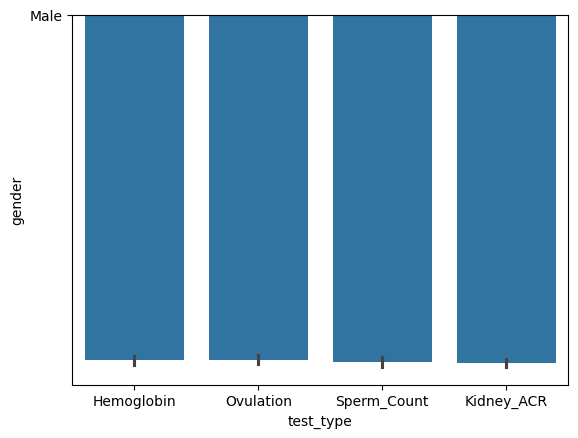

In [54]:
sns.barplot(data=df , x='test_type' , y='gender')

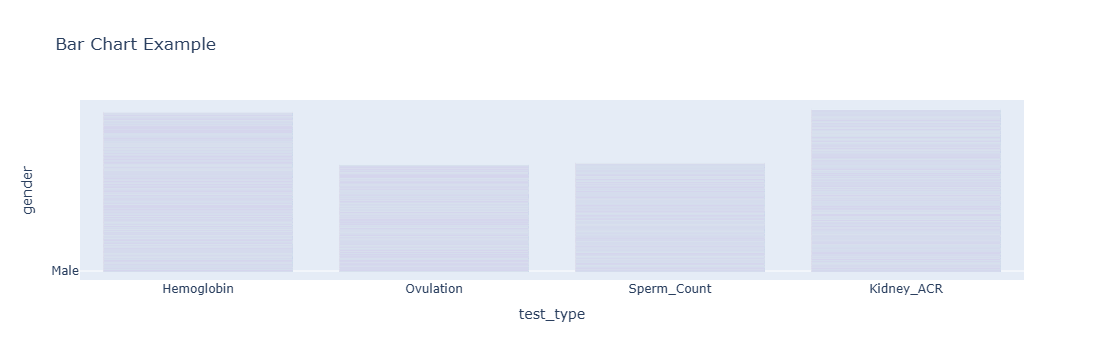

In [61]:
fig = px.bar(df, x="test_type", y="gender", title="Bar Chart Example" )
fig.show()

In [72]:
index =  df['test_type'].value_counts().sort_values(ascending=False)

In [66]:
index_v = df['test_type'].value_counts().sort_values(ascending=False).value_counts

In [74]:
index.values

array([30070, 29798, 20175, 19957], dtype=int64)

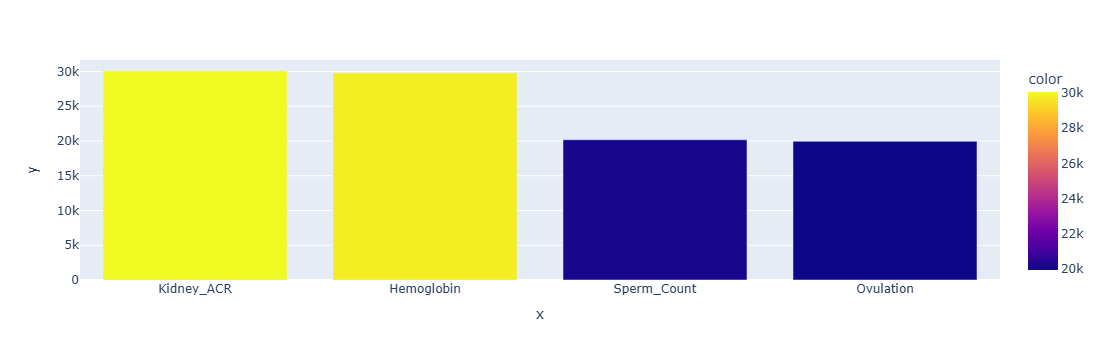

In [76]:
px.bar(x=index.index , y=index.values , color=index.values) 

In [80]:
age_d = df['gender'].value_counts()

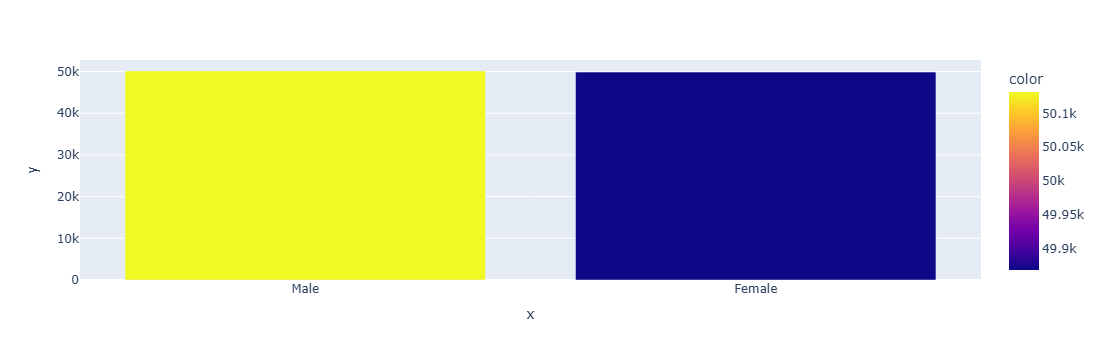

In [81]:
px.bar(x=age_d.index , y = age_d.values , color = age_d.values)

In [82]:
df.head()

patient_id  age  gender    test_type  result  doctor_id                date
0           1   56    Male   Hemoglobin    14.8        102 2023-01-01 00:00:00
1           2   69  Female    Ovulation    18.5        198 2023-01-01 00:01:00
2           3   46    Male    Ovulation    13.3        101 2023-01-01 00:02:00
3           4   32  Female  Sperm_Count    45.3        126 2023-01-01 00:03:00
4           5   60  Female    Ovulation    12.1        181 2023-01-01 00:04:00

In [86]:
disease = round(df.groupby('test_type')['age'].mean())

Text(0.5, 1.0, 'Average age of ckeckimg the test ')

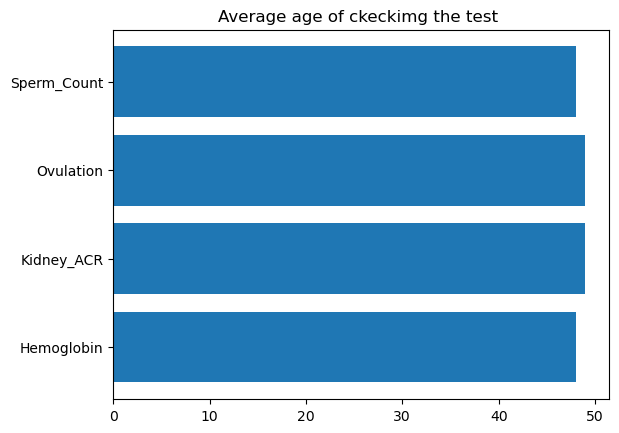

In [88]:
plt.barh(disease.index , disease.values)
plt.title("Average age of ckeckimg the test ")

In [89]:
df.head()

patient_id  age  gender    test_type  result  doctor_id                date
0           1   56    Male   Hemoglobin    14.8        102 2023-01-01 00:00:00
1           2   69  Female    Ovulation    18.5        198 2023-01-01 00:01:00
2           3   46    Male    Ovulation    13.3        101 2023-01-01 00:02:00
3           4   32  Female  Sperm_Count    45.3        126 2023-01-01 00:03:00
4           5   60  Female    Ovulation    12.1        181 2023-01-01 00:04:00